## Main notebook for experimenting with the algorithms

Here is a simple notebook to test your code. You can modify it as you please.

Remember to restart the jupyter kernel each time you modify a file.

In [33]:
%%capture

%pip install -r requirements.txt

In [34]:
import matplotlib.pyplot as plt

from src.utils import load_image, save_image, psnr, ssim
from src.forward_model import CFA
from src.methods.david_alexis.reconstruct import run_reconstruction

### Load the input image

In [35]:
image_path = 'images/img_2.png'

img = load_image(image_path)

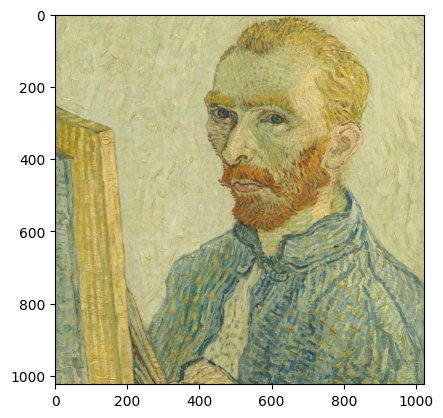

Shape of the image: (1024, 1024, 3).


In [36]:
# Shows some information on the image
plt.imshow(img)
plt.show()
print(f'Shape of the image: {img.shape}.')

### Definition of the forward model

To setup the forward operator we just need to instanciate the `CFA` class. This class needs two arguments: `cfa_name` being the kind of pattern (bayer or kodak), and `input_shape` the shape of the inputs of the operator.

This operation is linear and can be represented by a matrix $A$ but no direct access to this matrix is given (one can create it if needed). However the method `direct` allows to perform $A$'s operation. Likewise the method `adjoint` will perform the operation of $A^T$.

For example let $X \in \mathbb R^{M \times N \times 3}$ the input RGB image in natural shape. Then we got $x \in \mathbb R^{3MN}$ (vectorized version of $X$) and $A \in \mathbb R^{MN \times 3MN}$, leading to:

\begin{equation*}
    y = Ax \in \mathbb R^{MN} \quad \text{and} \quad z = A^Ty  \in \mathbb R^{3MN}
\end{equation*}

However thanks to `direct` and `adjoint` there is no need to work with vectorized images, except if it is interesting to create the matrix $A$ explicitly.

In [37]:
cfa_name = 'quad_bayer' # bayer or quad_bayer
op = CFA(cfa_name, img.shape)

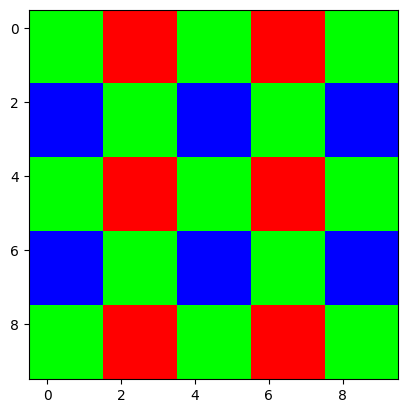

Shape of the mask: (1024, 1024, 3).


In [38]:
# Shows the mask
plt.imshow(op.mask[:10, :10])
plt.show()
print(f'Shape of the mask: {op.mask.shape}.')

In [39]:
# Applies the mask to the image
y = op.direct(img)

In [40]:
# Applies the adjoint operation to y
z = op.adjoint(y)

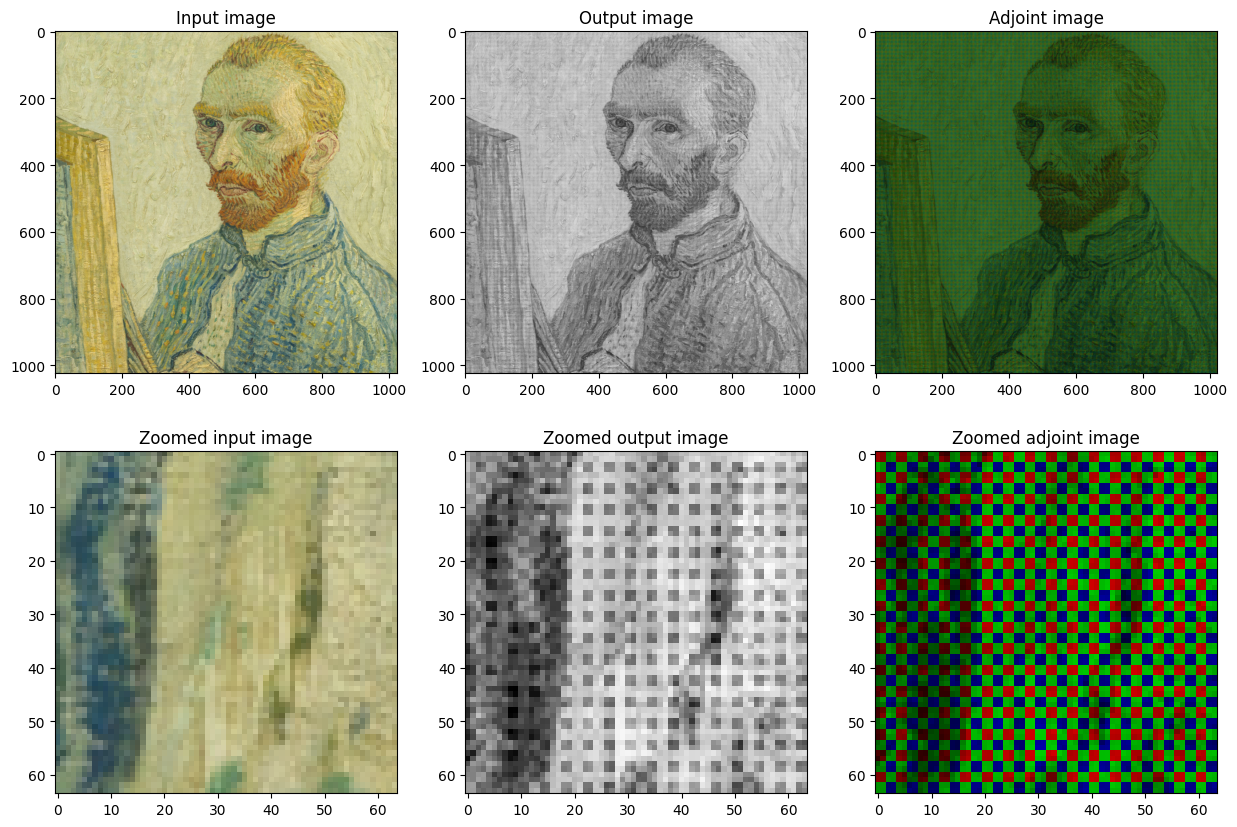

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Input image')
axs[0, 1].imshow(y, cmap='gray')
axs[0, 1].set_title('Output image')
axs[0, 2].imshow(z)
axs[0, 2].set_title('Adjoint image')
axs[1, 0].imshow(img[800:864, 450:514])
axs[1, 0].set_title('Zoomed input image')
axs[1, 1].imshow(y[800:864, 450:514], cmap='gray')
axs[1, 1].set_title('Zoomed output image')
axs[1, 2].imshow(z[800:864, 450:514])
axs[1, 2].set_title('Zoomed adjoint image')
plt.show()

### Run the reconstruction

Here the goal is to reconstruct the image `img` using only `y` and `op` (using `img` is forbidden).

To run the reconstruction we simply call the function `run_reconstruction`. This function takes in argument the image to reconstruct and the kind of CFA used (bayer or kodak). All the parameters related to the reconstruction itself must be written inside `run_reconstruction`.

In [42]:
res = run_reconstruction(y, cfa_name)

In [43]:
# Prints some information on the reconstruction
print(f'Size of the reconstruction: {res.shape}.')

Size of the reconstruction: (1024, 1024, 3).


### Quantitative and qualitative results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


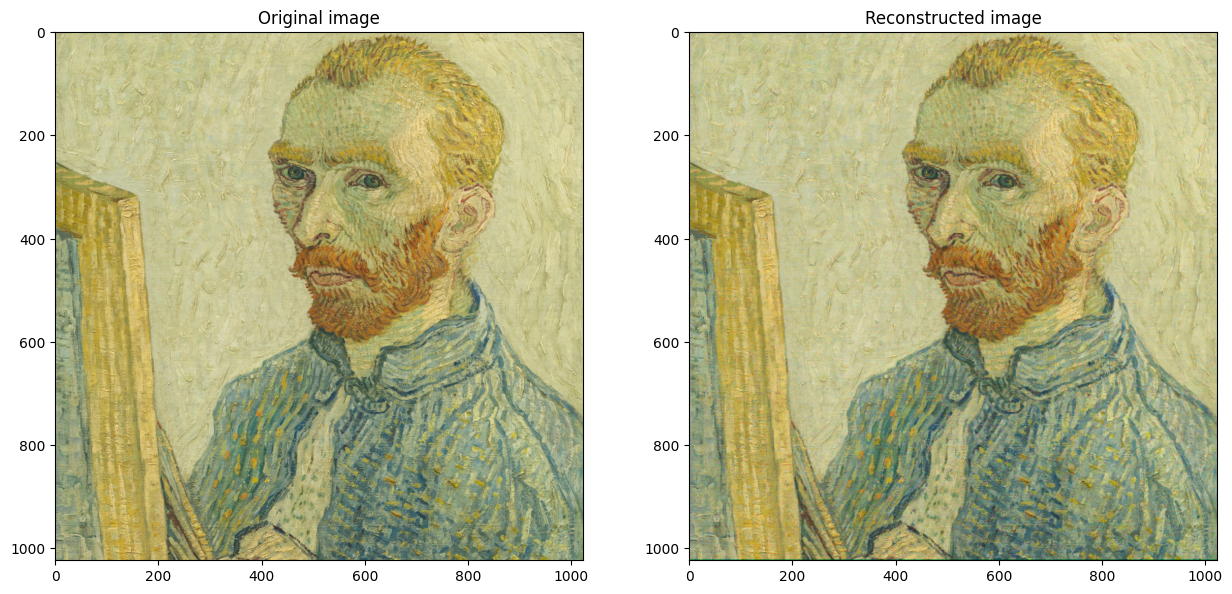

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(res)
axs[1].set_title('Reconstructed image')
plt.show()

In [45]:
# Computes some metrics
print(f'PSNR: {psnr(img, res):.2f}')
print(f'SSIM: {ssim(img, res):.4f}')

PSNR: 26.81
SSIM: 0.7578


### Save the reconstructed image

In [46]:
reconstructed_path = 'output/reconstructed_image.png'

save_image(reconstructed_path, res)